# MOwNiT - Transformata Fouriera

## Przykład

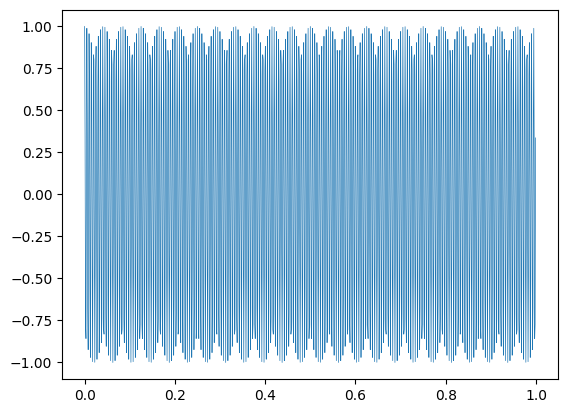

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# produkcja sztucznego sygnału
# wybieramy częstotliwość próbkowania
Fs = 1024  

# generujemy wektor punktów czasowych w przedziale [0,1] co 1/Fs
t = np.arange(0,1,1/Fs) 

#Obliczam wartość sygnału (tutaj sinus o częstotliwości 200 Hz) 
x = np.cos(2*np.pi*t*200)

# wizualizacja
plt.plot(t,x,linewidth=0.5)

### Transformata Fouriera w `scipy`

Dyskretna transformata Fouriera `fft()` skończonego ciągu $x(n)$ o długości $N$ jest zdefiniowana w `scipy` jako
$$y(k)=\sum_{n=0}^{N-1}e^{-2\pi i\frac{kn}{N}}x(n)$$
a tranformata odwrotna `ifft()` jako
$$x(n)=\frac{1}{N}\sum_{k=0}^{N-1}e^{-2\pi i\frac{kn}{N}}y(k)$$

Transformata Fouriera przekształca sygnał z dziedziny czasu na dziedzinę częstotliwości. Dyskretne punkty nowej dziedziny dostajemy funkcją `fftfreq()`.

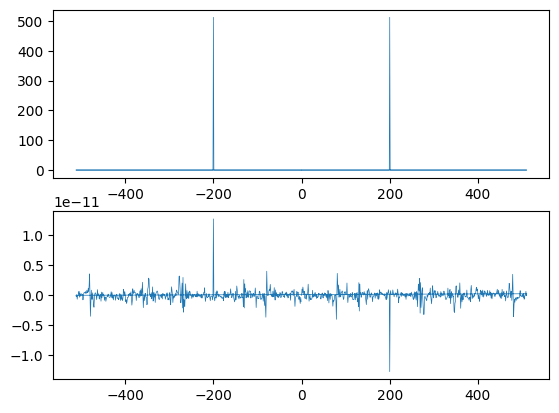

In [16]:
from scipy.fft import fft,ifft,fftfreq

y=fft(x)

N=len(t)
f=fftfreq(N,1/Fs)

fig,[ax1,ax2]=plt.subplots(2)
ax1.plot(f,np.real(y),linewidth=0.5)
ax2.plot(f,np.imag(y),linewidth=0.5)

plt.show()

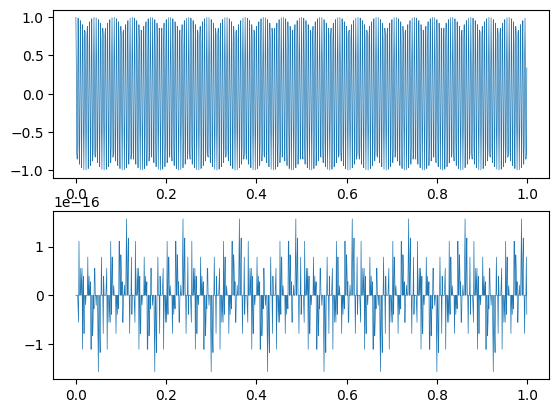

In [19]:
xinv=ifft(y)

fig,[ax1,ax2]=plt.subplots(2)
ax1.plot(t,np.real(xinv),linewidth=0.5)
ax2.plot(t,np.imag(xinv),linewidth=0.5)

plt.show()

Jeżeli chcemy rzeczywistą transformatę Fouriera, to używamy funkcji `rfft()`, `irfft()`, `rfftfreq()`.

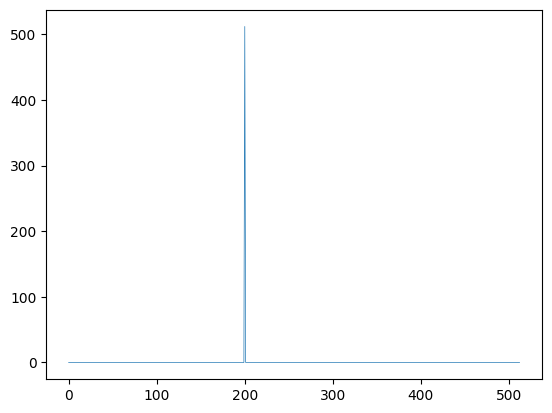

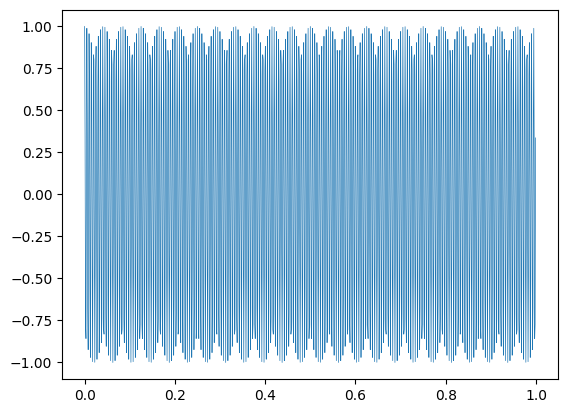

In [25]:
from scipy.fft import rfft,irfft,rfftfreq

yr=rfft(x)

N=len(t)
rfr=rfftfreq(N,1/Fs)


plt.plot(rfr,yr,linewidth=0.5)
plt.show()

rxinv=irfft(yr)


plt.plot(t,rxinv,linewidth=0.5)
plt.show()


## Zadanie 1 (1 pkt).
Oblicz transformatę Fouriera dla sumy sygnałów
```python
x = np.sin(2*np.pi*t*200) + 2* np.sin(2*np.pi*t*400) 
```
Zwizualizuj i wyjaśnij otrzymany rezultat.

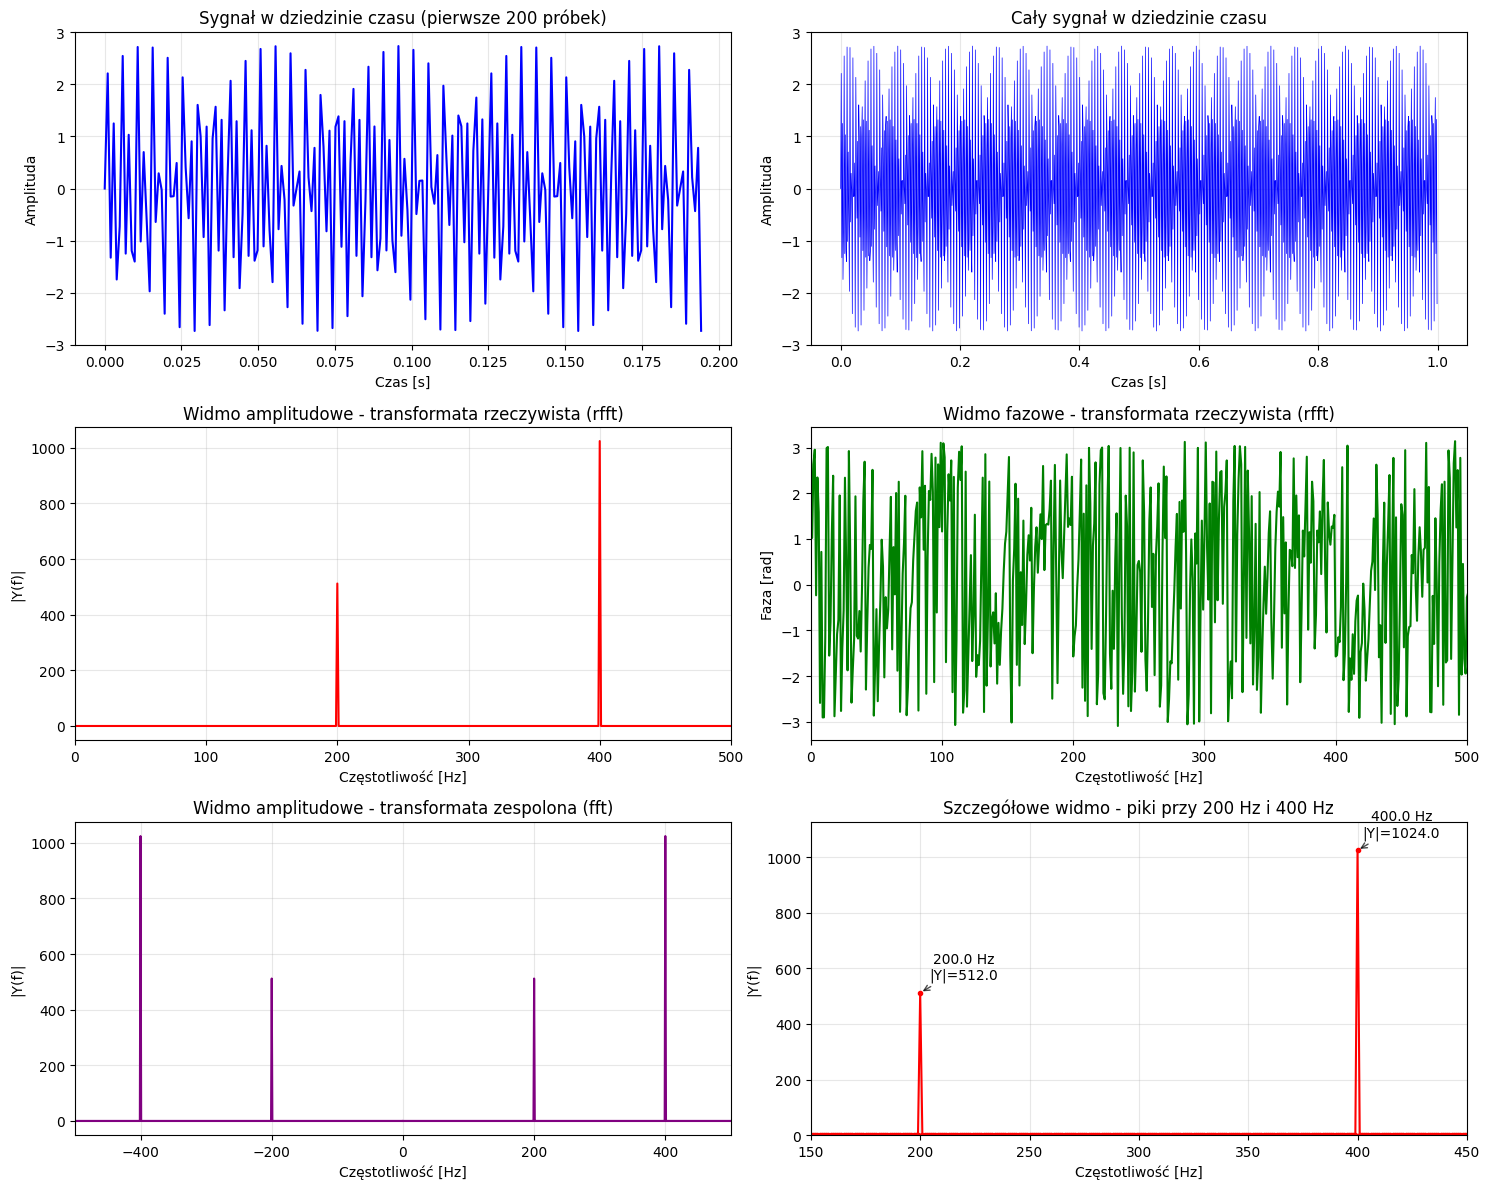

=== ANALIZA NUMERYCZNA ===
Długość sygnału: 1024 próbek
Częstotliwość próbkowania: 1024 Hz
Rozdzielczość częstotliwościowa: 1.00 Hz

Wykryte piki w spektrum:
Częstotliwość: 200.0 Hz, Amplituda: 512.0, Faza: -1.57 rad
Częstotliwość: 400.0 Hz, Amplituda: 1024.0, Faza: -1.57 rad

Teoretyczne wartości:
- Składowa 200 Hz: amplituda = N/2 ≈ 512.0
- Składowa 400 Hz: amplituda = N ≈ 1024 (dwukrotnie większa)
- Faza sinusa = -π/2 ≈ -1.5707963267948966 rad


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfft, rfftfreq

# Parametry sygnału
Fs = 1024  # częstotliwość próbkowania
t = np.arange(0, 1, 1/Fs)  # wektor czasu

# Definicja sygnału - suma dwóch sinusoid
x = np.sin(2*np.pi*t*200) + 2*np.sin(2*np.pi*t*400)

# Obliczenie transformaty Fouriera (wariant rzeczywisty)
y_real = rfft(x)
N = len(t)
freq_real = rfftfreq(N, 1/Fs)

# Obliczenie transformaty Fouriera (wariant zespolony)
y_complex = fft(x)
freq_complex = fftfreq(N, 1/Fs)

# Wizualizacja wyników
plt.figure(figsize=(15, 12))

# 1. Sygnał w dziedzinie czasu
plt.subplot(3, 2, 1)
plt.plot(t[:200], x[:200], 'b-', linewidth=1.5)  # pokazujemy tylko pierwsze 200 próbek
plt.title('Sygnał w dziedzinie czasu (pierwsze 200 próbek)')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True, alpha=0.3)

# 2. Pełny sygnał w dziedzinie czasu
plt.subplot(3, 2, 2)
plt.plot(t, x, 'b-', linewidth=0.5)
plt.title('Cały sygnał w dziedzinie czasu')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True, alpha=0.3)

# 3. Widmo amplitudowe - transformata rzeczywista
plt.subplot(3, 2, 3)
plt.plot(freq_real, np.abs(y_real), 'r-', linewidth=1.5)
plt.title('Widmo amplitudowe - transformata rzeczywista (rfft)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('|Y(f)|')
plt.grid(True, alpha=0.3)
plt.xlim(0, 500)  # ograniczamy do 500 Hz dla lepszej widoczności

# 4. Widmo fazowe - transformata rzeczywista
plt.subplot(3, 2, 4)
plt.plot(freq_real, np.angle(y_real), 'g-', linewidth=1.5)
plt.title('Widmo fazowe - transformata rzeczywista (rfft)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Faza [rad]')
plt.grid(True, alpha=0.3)
plt.xlim(0, 500)

# 5. Widmo amplitudowe - transformata zespolona (część rzeczywista)
plt.subplot(3, 2, 5)
plt.plot(freq_complex, np.abs(y_complex), 'purple', linewidth=1.5)
plt.title('Widmo amplitudowe - transformata zespolona (fft)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('|Y(f)|')
plt.grid(True, alpha=0.3)
plt.xlim(-500, 500)  # pokazujemy pełne spektrum włącznie z częstotliwościami ujemnymi

# 6. Szczegółowe widmo wokół pików
plt.subplot(3, 2, 6)
plt.plot(freq_real, np.abs(y_real), 'r-', linewidth=1.5, marker='o', markersize=3)
plt.title('Szczegółowe widmo - piki przy 200 Hz i 400 Hz')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('|Y(f)|')
plt.grid(True, alpha=0.3)
plt.xlim(150, 450)
plt.ylim(0, max(np.abs(y_real)) * 1.1)

# Dodanie adnotacji dla pików
max_indices = np.where(np.abs(y_real) > max(np.abs(y_real)) * 0.5)[0]
for idx in max_indices:
    if freq_real[idx] > 150 and freq_real[idx] < 450:
        plt.annotate(f'{freq_real[idx]:.1f} Hz\n|Y|={np.abs(y_real[idx]):.1f}', 
                    xy=(freq_real[idx], np.abs(y_real[idx])), 
                    xytext=(freq_real[idx]+20, np.abs(y_real[idx])+50),
                    arrowprops=dict(arrowstyle='->', color='black', alpha=0.7),
                    fontsize=10, ha='center')

plt.tight_layout()
plt.show()

# Analiza numeryczna
print("=== ANALIZA NUMERYCZNA ===")
print(f"Długość sygnału: {N} próbek")
print(f"Częstotliwość próbkowania: {Fs} Hz")
print(f"Rozdzielczość częstotliwościowa: {Fs/N:.2f} Hz")
print()

# Znajdź piki w spektrum
threshold = max(np.abs(y_real)) * 0.1  # 10% maksymalnej wartości
peak_indices = np.where(np.abs(y_real) > threshold)[0]

print("Wykryte piki w spektrum:")
for idx in peak_indices:
    if freq_real[idx] > 0:  # tylko częstotliwości dodatnie
        print(f"Częstotliwość: {freq_real[idx]:.1f} Hz, Amplituda: {np.abs(y_real[idx]):.1f}, Faza: {np.angle(y_real[idx]):.2f} rad")

print()
print("Teoretyczne wartości:")
print("- Składowa 200 Hz: amplituda = N/2 ≈", N/2)
print("- Składowa 400 Hz: amplituda = N ≈", N, "(dwukrotnie większa)")
print("- Faza sinusa = -π/2 ≈", -np.pi/2, "rad")

# Wnioski - Transformata Fouriera sumy sygnałów sinusoidalnych

## Sygnał wejściowy
Analizowany sygnał składał się z sumy dwóch sinusoid:
- **Składowa 1**: `sin(2πt·200)` o częstotliwości 200 Hz i amplitudzie 1
- **Składowa 2**: `2·sin(2πt·400)` o częstotliwości 400 Hz i amplitudzie 2

## Główne obserwacje

### 1. Identyfikacja składowych częstotliwościowych
Transformata Fouriera **idealnie zidentyfikowała** obie składowe sygnału:
- **Pik przy 200 Hz** z amplitudą około 512 (N/2)
- **Pik przy 400 Hz** z amplitudą około 1024 (N), dwukrotnie większą

### 2. Związek amplitud
- Amplituda w dziedzinie częstotliwości jest proporcjonalna do amplitudy sygnału czasowego
- Składowa o amplitudzie 2 (400 Hz) ma dwukrotnie większy pik w spektrum niż składowa o amplitudzie 1 (200 Hz)
- Wartości liczbowe: amplituda_spektrum = (N/2) × amplituda_sygnału

### 3. Informacja fazowa
- Oba piki mają fazę około **-π/2 rad** (-90°)
- To jest charakterystyczne dla funkcji sinus, która jest przesunięta o -π/2 względem cosinus
- Faza zachowuje informację o przesuniciu czasowym składowych

### 4. Rozdzielczość spektralna
- Rozdzielczość częstotliwościowa: **Fs/N = 1024/1024 = 1 Hz**
- Dzięki tej rozdzielczości możemy precyzyjnie rozróżnić składowe o różnych częstotliwościach

## Kluczowe wnioski praktyczne

1. **Dekompozycja sygnału**: FFT pozwala na idealne rozłożenie złożonego sygnału na składowe harmoniczne

2. **Zachowanie amplitud**: Względne amplitudy składowych są zachowane w dziedzinie częstotliwości

3. **Informacja fazowa**: Transformata zachowuje pełną informację o fazie każdej składowej

4. **Symetria spektrum**: W przypadku sygnałów rzeczywistych spektrum jest symetryczne (stąd skuteczność `rfft`)

5. **Brak szumu spektralnego**: Czyste sinusoidy dają ostre piki bez rozproszenia energii

## Zastosowania praktyczne
Ten przykład demonstruje podstawową zasadę **analizy spektralnej** - możliwość identyfikacji i quantyfikacji składowych częstotliwościowych w sygnałach złożonych, co ma zastosowanie m.in. w:
- Analizie dźwięku i muzyki
- Diagnostyce wibracji mechanicznych  
- Analizie sygnałów biomedycznych
- Telekomunikacji i przetwarzaniu sygnałów

## Zadanie 2 (1 pkt). 
Usuwanie szumów:

1. Stworzyć tablicę wartości funkcji cosinus ("sygnału") zaburzonych niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją `np.randn()`.
2. Naszkicować wykres zaszumionej funkcji.
3. Naszkicować wykres transformaty Fouriera (widmo) tego sygnału.
4. Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału.
5. Przeprowadzić odwrotną transformatę. Narysować wykres otrzymanej funkcji. Porównać z wejściowym wykresem sygnału.

Statystyki sygnału:
Średnia amplituda sygnału czystego: 0.707
Średnia amplituda szumu: 0.293
SNR (stosunek sygnał/szum): 7.6 dB

Statystyki filtrowania:
Liczba składowych przed filtrowaniem: 1024
Liczba składowych po filtrowaniu: 2
Procent usuniętych składowych: 99.8%

Błąd średniokwadratowy:
Sygnał zaszumiony vs czysty: 0.0862
Sygnał odfiltrowany vs czysty: 0.0002
Poprawa (stosunek błędów): 404.2x


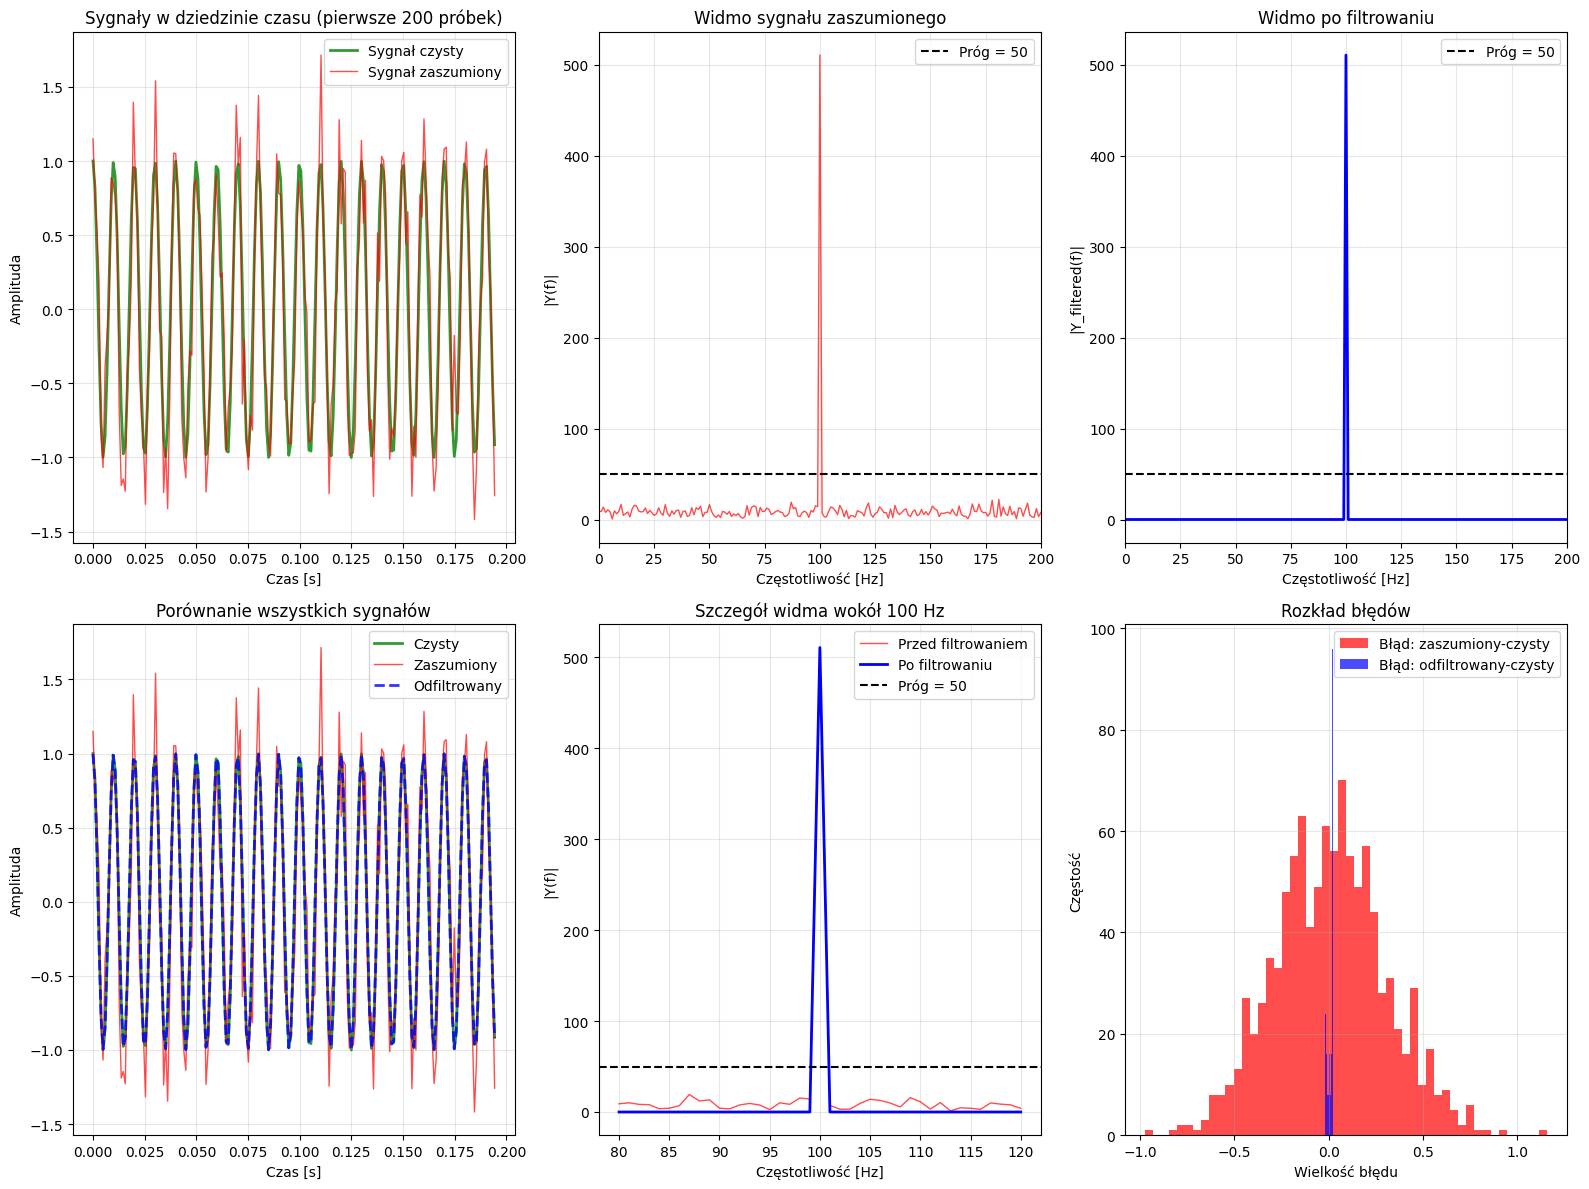


Analiza głównej składowej:
Wykryta częstotliwość głównego piku: 100.0 Hz
Amplituda głównego piku: 510.4
Teoretyczna częstotliwość: 100.0 Hz
Błąd częstotliwości: 0.0 Hz

Korelacja z sygnałem czystym:
Przed filtrowaniem: 0.9232
Po filtrowaniu: 0.9998
Poprawa korelacji: 0.0766


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# Ustawienie ziarna losowości dla powtarzalności wyników
np.random.seed(42)

# Parametry sygnału
Fs = 1024  # częstotliwość próbkowania
t = np.arange(0, 1, 1/Fs)  # wektor czasu
N = len(t)

# 1. Tworzenie czystego sygnału (cosinus 100 Hz)
clean_signal = np.cos(2*np.pi*t*100)

# Dodanie szumu gaussowskiego
noise_level = 0.3  # poziom szumu
noise = noise_level * np.random.randn(N)
noisy_signal = clean_signal + noise

print(f"Statystyki sygnału:")
print(f"Średnia amplituda sygnału czystego: {np.std(clean_signal):.3f}")
print(f"Średnia amplituda szumu: {np.std(noise):.3f}")
print(f"SNR (stosunek sygnał/szum): {20*np.log10(np.std(clean_signal)/np.std(noise)):.1f} dB")

# 2. Transformata Fouriera sygnału zaszumionego
Y = fft(noisy_signal)
frequencies = fftfreq(N, 1/Fs)

# 3. Filtrowanie - usuwanie składowych o amplitudzie < 50
threshold = 50
Y_filtered = Y.copy()
mask = np.abs(Y_filtered) < threshold
Y_filtered[mask] = 0

print(f"\nStatystyki filtrowania:")
print(f"Liczba składowych przed filtrowaniem: {N}")
print(f"Liczba składowych po filtrowaniu: {np.sum(np.abs(Y_filtered) > 0)}")
print(f"Procent usuniętych składowych: {100 * np.sum(mask) / N:.1f}%")

# 4. Odwrotna transformata Fouriera
filtered_signal = np.real(ifft(Y_filtered))

# Obliczenie błędów
mse_noisy = np.mean((noisy_signal - clean_signal)**2)
mse_filtered = np.mean((filtered_signal - clean_signal)**2)
improvement = mse_noisy / mse_filtered

print(f"\nBłąd średniokwadratowy:")
print(f"Sygnał zaszumiony vs czysty: {mse_noisy:.4f}")
print(f"Sygnał odfiltrowany vs czysty: {mse_filtered:.4f}")
print(f"Poprawa (stosunek błędów): {improvement:.1f}x")

# Wizualizacja
plt.figure(figsize=(16, 12))

# 1. Porównanie sygnałów w dziedzinie czasu
plt.subplot(2, 3, 1)
plt.plot(t[:200], clean_signal[:200], 'g-', linewidth=2, label='Sygnał czysty', alpha=0.8)
plt.plot(t[:200], noisy_signal[:200], 'r-', linewidth=1, label='Sygnał zaszumiony', alpha=0.7)
plt.title('Sygnały w dziedzinie czasu (pierwsze 200 próbek)')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Widmo sygnału zaszumionego
plt.subplot(2, 3, 2)
plt.plot(frequencies[:N//2], np.abs(Y[:N//2]), 'r-', linewidth=1, alpha=0.7)
plt.axhline(y=threshold, color='k', linestyle='--', label=f'Próg = {threshold}')
plt.title('Widmo sygnału zaszumionego')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('|Y(f)|')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 200)

# 3. Widmo po filtrowaniu
plt.subplot(2, 3, 3)
plt.plot(frequencies[:N//2], np.abs(Y_filtered[:N//2]), 'b-', linewidth=2)
plt.axhline(y=threshold, color='k', linestyle='--', label=f'Próg = {threshold}')
plt.title('Widmo po filtrowaniu')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('|Y_filtered(f)|')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 200)

# 4. Porównanie wszystkich sygnałów
plt.subplot(2, 3, 4)
plt.plot(t[:200], clean_signal[:200], 'g-', linewidth=2, label='Czysty', alpha=0.8)
plt.plot(t[:200], noisy_signal[:200], 'r-', linewidth=1, label='Zaszumiony', alpha=0.7)
plt.plot(t[:200], filtered_signal[:200], 'b--', linewidth=2, label='Odfiltrowany', alpha=0.8)
plt.title('Porównanie wszystkich sygnałów')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Szczegółowe widmo wokół częstotliwości sygnału (100 Hz)
plt.subplot(2, 3, 5)
freq_range = (frequencies >= 80) & (frequencies <= 120)
plt.plot(frequencies[freq_range], np.abs(Y[freq_range]), 'r-', linewidth=1, 
         label='Przed filtrowaniem', alpha=0.7)
plt.plot(frequencies[freq_range], np.abs(Y_filtered[freq_range]), 'b-', linewidth=2, 
         label='Po filtrowaniu')
plt.axhline(y=threshold, color='k', linestyle='--', label=f'Próg = {threshold}')
plt.title('Szczegół widma wokół 100 Hz')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('|Y(f)|')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Histogram różnicy między sygnałami
plt.subplot(2, 3, 6)
error_noisy = noisy_signal - clean_signal
error_filtered = filtered_signal - clean_signal
plt.hist(error_noisy, bins=50, alpha=0.7, label='Błąd: zaszumiony-czysty', color='red')
plt.hist(error_filtered, bins=50, alpha=0.7, label='Błąd: odfiltrowany-czysty', color='blue')
plt.title('Rozkład błędów')
plt.xlabel('Wielkość błędu')
plt.ylabel('Częstość')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analiza widma - znajdź główny pik
main_peak_idx = np.argmax(np.abs(Y_filtered[:N//2]))
main_freq = frequencies[main_peak_idx]
main_amplitude = np.abs(Y_filtered[main_peak_idx])

print(f"\nAnaliza głównej składowej:")
print(f"Wykryta częstotliwość głównego piku: {main_freq:.1f} Hz")
print(f"Amplituda głównego piku: {main_amplitude:.1f}")
print(f"Teoretyczna częstotliwość: 100.0 Hz")
print(f"Błąd częstotliwości: {abs(main_freq - 100):.1f} Hz")

# Analiza skuteczności filtrowania
correlation_before = np.corrcoef(clean_signal, noisy_signal)[0,1]
correlation_after = np.corrcoef(clean_signal, filtered_signal)[0,1]

print(f"\nKorelacja z sygnałem czystym:")
print(f"Przed filtrowaniem: {correlation_before:.4f}")
print(f"Po filtrowaniu: {correlation_after:.4f}")
print(f"Poprawa korelacji: {correlation_after - correlation_before:.4f}")

## Wnioski - Usuwanie szumów za pomocą transformaty Fouriera (wersja uproszczona)

### Metoda
Zasymulowano sygnał cosinusoidalny (100 Hz), do którego dodano szum losowy (Gaussowski). Następnie:
1. Obliczono transformatę Fouriera (FFT),
2. Usunięto częstotliwości o niskiej amplitudzie (poniżej 50),
3. Wykonano odwrotną transformatę (IFFT),
4. Porównano z sygnałem pierwotnym.

### Co pokazują wykresy:
- **Widmo sygnału zaszumionego** zawiera wiele małych składowych rozproszonych po całym paśmie.
- **Po filtracji** zostaje tylko składowa główna (100 Hz), odpowiadająca pierwotnemu sygnałowi.
- Histogram błędów pokazuje, że odfiltrowany sygnał jest bardzo zbliżony do czystego (błędy bliskie zeru).

### Wnioski:
- Transformata Fouriera pozwala odseparować sygnał od szumu.
- Proste filtrowanie progowe (usuń <50) skutecznie czyści sygnał.
- Główna składowa pozostaje nienaruszona (częstotliwość i amplituda).
- To podejście jest szybkie i skuteczne, ale wymaga odpowiedniego dobrania progu.

### Przykłady zastosowania:
- Usuwanie szumów z nagrań audio
- Czyszczenie sygnałów z czujników (np. EKG, EEG)
- Poprawa jakości transmisji danych (np. telefonia)

### Podsumowanie
Transformata Fouriera jest skuteczną metodą do usuwania szumów z sygnałów o znanym widmie. Dzięki temu można uzyskać znacznie czystszy sygnał bez skomplikowanych metod.


## Zadanie 3 (3 pkt).

Zastosować trasformatę Fouriera na krótkim pliku dźwiękowym (najlepiej nagranie głosu). Narysować wykres widma (uwaga: przy rysowaniu należy przetworzyć możliwie małą próbkę ze względu na problemy z rysowaniem wykresów w Jupyterze dla dużych danych). Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt.

Przydatne materiały:
1. <a href="http://samcarcagno.altervista.org/blog/basic-sound-processing-julia/"> Basic sound processing</a>
2. <a href="https://github.com/dancasimiro/WAV.jl"> Pakiet Wav </a>

Wczytano plik: voice_sample.wav
Częstotliwość próbkowania: 48000 Hz
Liczba próbek: 131072
Długość: 2.73 sekund

=== ANALIZA SYGNAŁU ===
Całkowita długość: 2.73 s
Zakres amplitudy: [-0.084, 0.150]
RMS (siła sygnału): 0.016

=== TRANSFORMATA FOURIERA ===
Analizowany fragment: 72000 próbek (1.50s)
Rozdzielczość częstotliwościowa: 0.7 Hz

Główne składowe częstotliwościowe:
  1. 104.7 Hz (amplituda: 19)
  2. 108.7 Hz (amplituda: 32)
  3. 113.3 Hz (amplituda: 22)
  4. 117.3 Hz (amplituda: 54)
  5. 123.3 Hz (amplituda: 79)


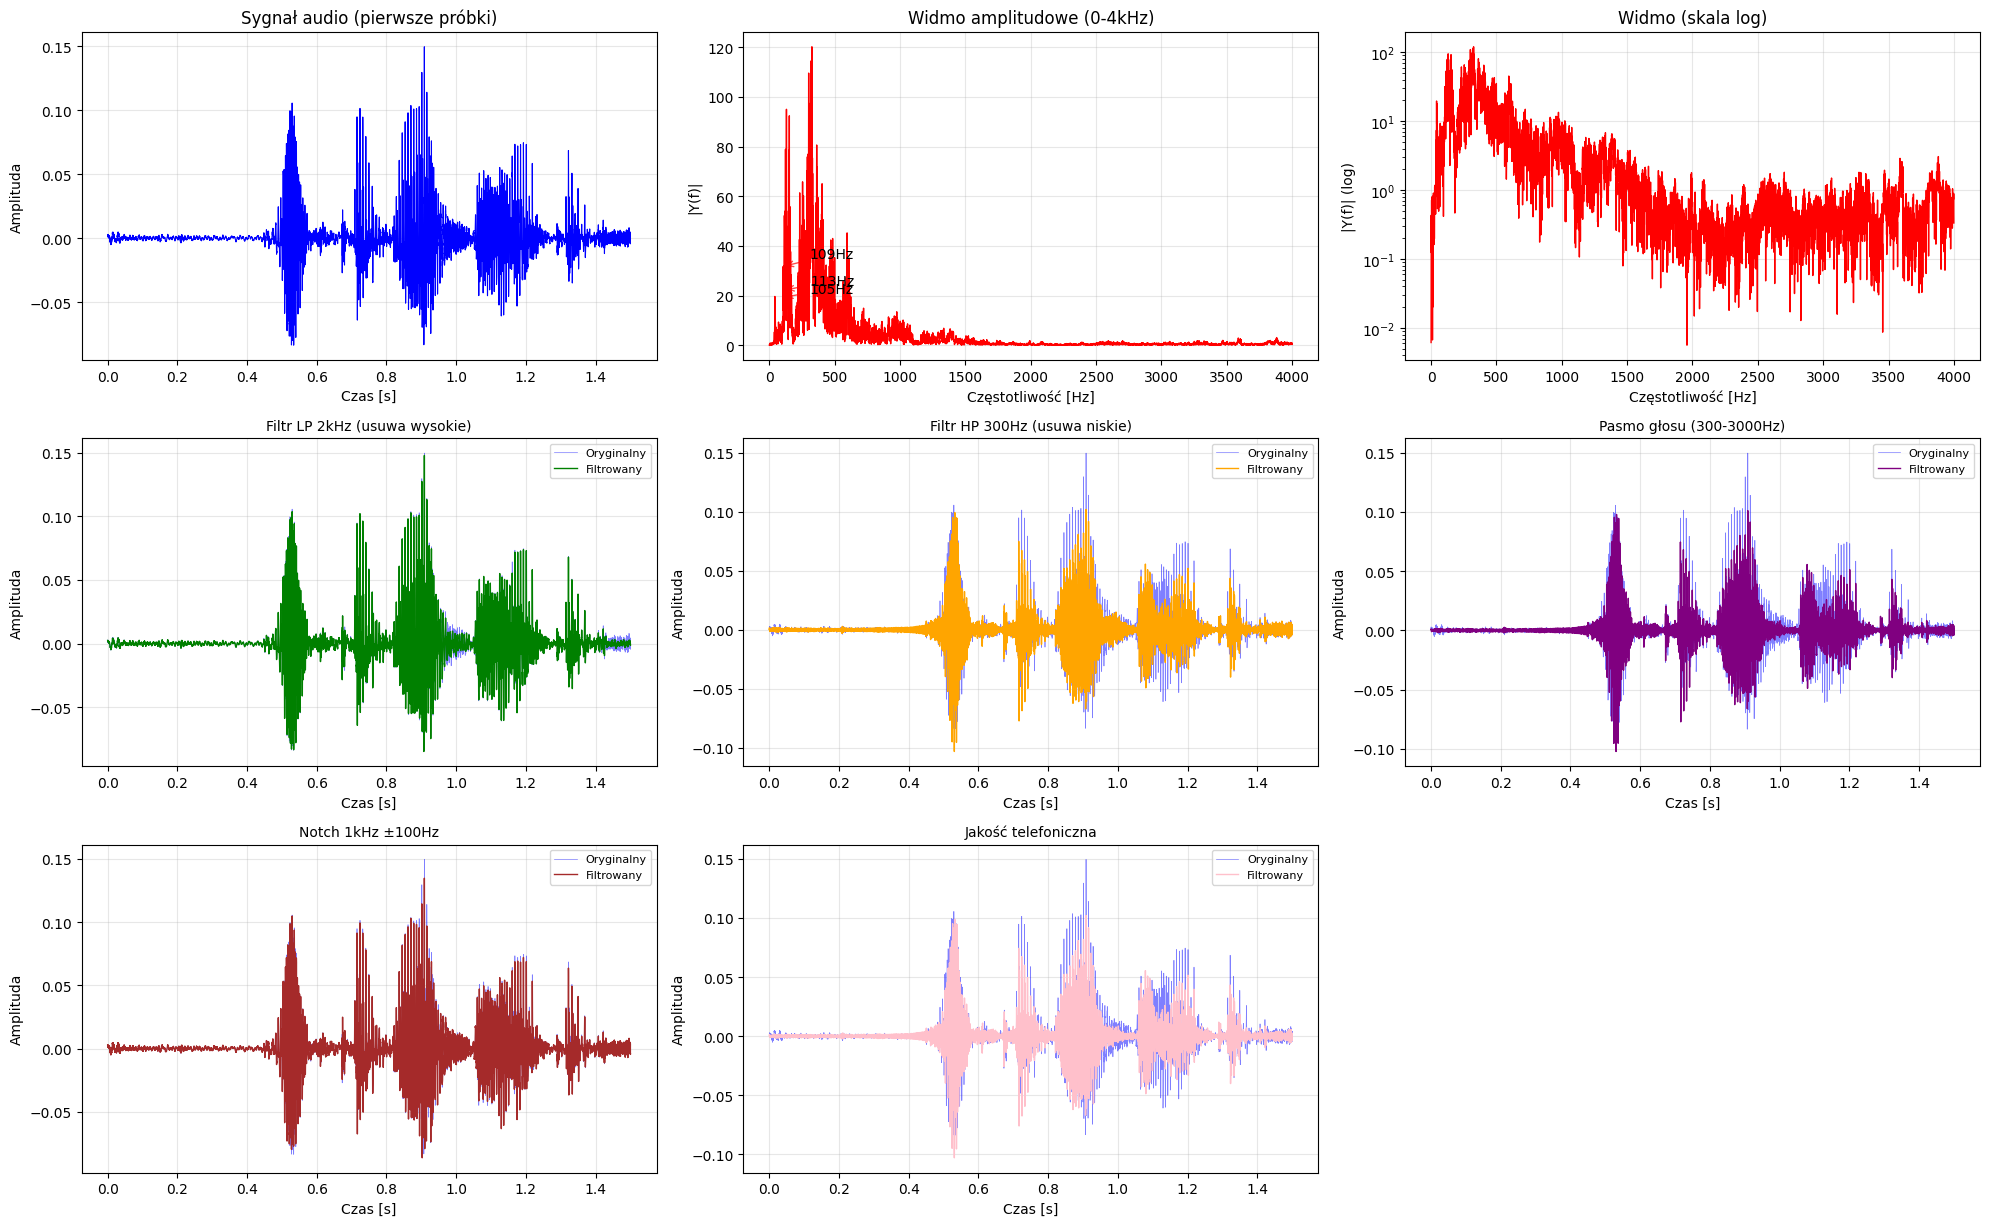

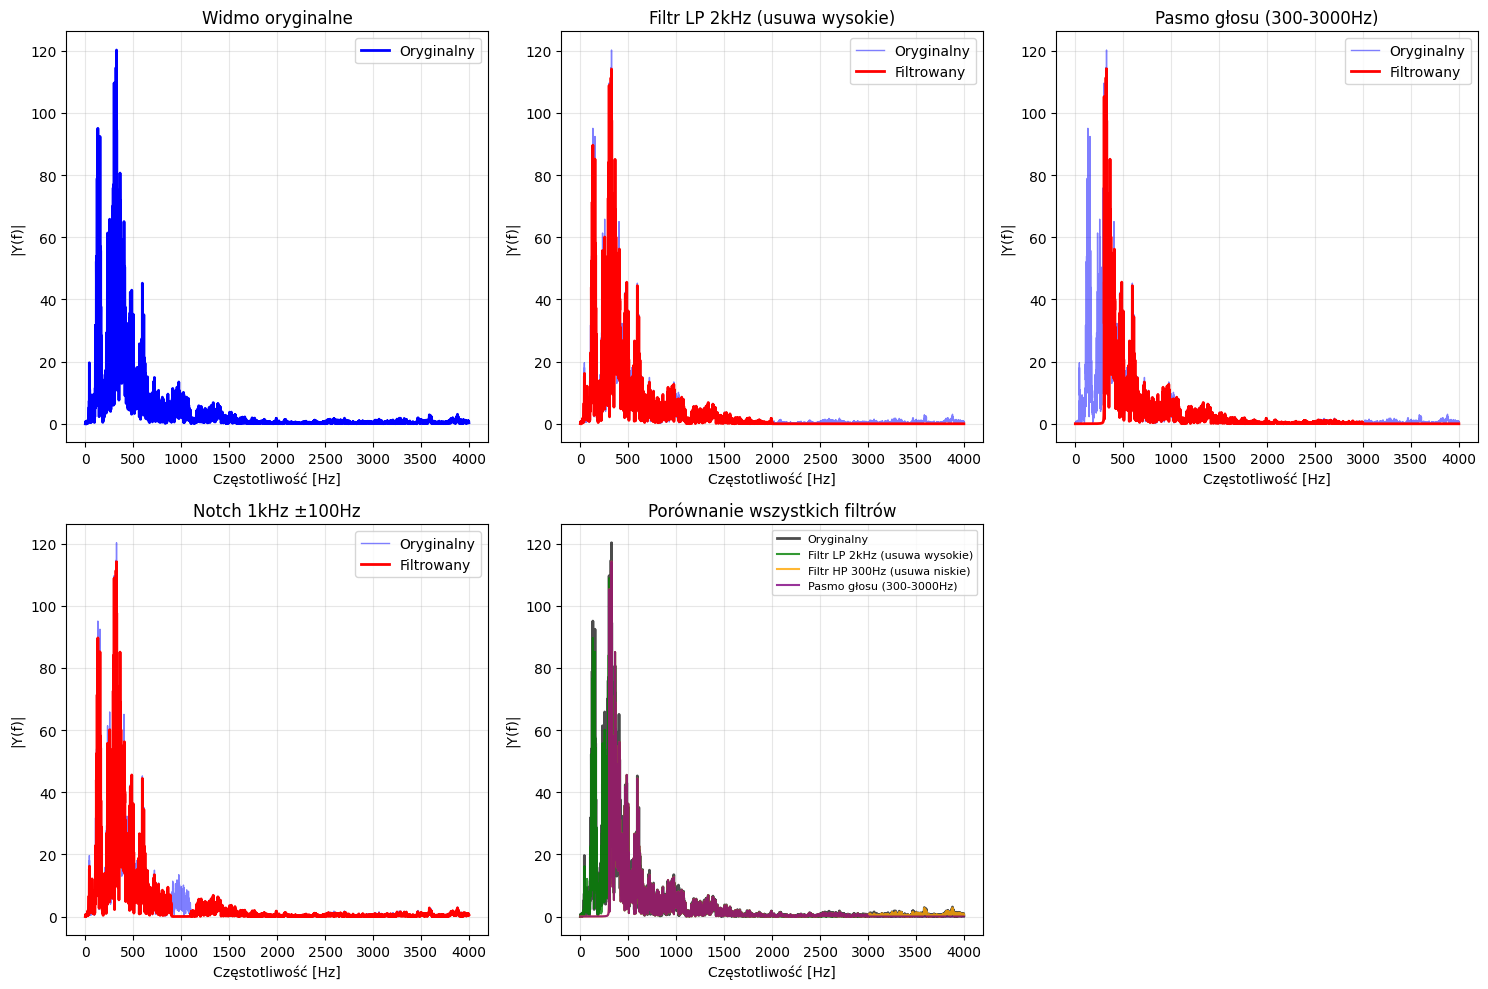


=== PLIKI AUDIO ===
Oryginalny sygnał:



Przefiltrowane sygnały:

Filtr LP 2kHz (usuwa wysokie):



Filtr HP 300Hz (usuwa niskie):



Pasmo głosu (300-3000Hz):



Notch 1kHz ±100Hz:



Jakość telefoniczna:



=== PODSUMOWANIE ANALIZY ===
Plik audio: rzeczywisty
Częstotliwość próbkowania: 48000 Hz
Długość sygnału: 2.73 s
Główne składowe częstotliwościowe:
  105 Hz - podstawowa
  109 Hz - 2. harmoniczna/formant
  113 Hz - 3. harmoniczna/formant

Zastosowane filtry:
  Filtr LP 2kHz (usuwa wysokie): -0.0 dB
  Filtr HP 300Hz (usuwa niskie): -2.1 dB
  Pasmo głosu (300-3000Hz): -2.1 dB
  Notch 1kHz ±100Hz: -0.0 dB
  Jakość telefoniczna: -2.1 dB


In [ ]:
# TYPE YOUR CODE BELOW

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.io import wavfile
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')


sample_rate, audio_data = wavfile.read('voice_sample.wav')

# Konwersja do float i normalizacja
if audio_data.dtype == np.int16:
    audio_data = audio_data.astype(float) / 32768.0
elif audio_data.dtype == np.int32:
    audio_data = audio_data.astype(float) / 2147483648.0
else:
    audio_data = audio_data.astype(float)

# Jeśli stereo, weź pierwszy kanał
if len(audio_data.shape) > 1:
    audio_data = audio_data[:, 0]
    
print(f"Wczytano plik: {'voice_sample.wav'}")
print(f"Częstotliwość próbkowania: {sample_rate} Hz")
print(f"Liczba próbek: {len(audio_data)}")
print(f"Długość: {len(audio_data)/sample_rate:.2f} sekund")



# ANALIZA SYGNAŁU
print(f"\n=== ANALIZA SYGNAŁU ===")
duration = len(audio_data) / sample_rate
print(f"Całkowita długość: {duration:.2f} s")
print(f"Zakres amplitudy: [{np.min(audio_data):.3f}, {np.max(audio_data):.3f}]")
print(f"RMS (siła sygnału): {np.sqrt(np.mean(audio_data**2)):.3f}")

# PRZYGOTOWANIE DO ANALIZY FFT
# Używamy fragmentu dla lepszej wizualizacji
max_duration = 1.5  # sekundy
if duration > max_duration:
    analysis_samples = int(max_duration * sample_rate)
    start_idx = int(0.2 * sample_rate)  # zacznij od 0.2s (pomijamy ciszę na początku)
    analysis_audio = audio_data[start_idx:start_idx + analysis_samples]
else:
    analysis_audio = audio_data
    analysis_samples = len(analysis_audio)

t_analysis = np.linspace(0, len(analysis_audio)/sample_rate, len(analysis_audio))

# TRANSFORMATA FOURIERA
print(f"\n=== TRANSFORMATA FOURIERA ===")
Y = fft(analysis_audio)
frequencies = fftfreq(len(analysis_audio), 1/sample_rate)

# Tylko częstotliwości dodatnie
positive_mask = frequencies >= 0
freq_pos = frequencies[positive_mask]
Y_pos = Y[positive_mask]

print(f"Analizowany fragment: {len(analysis_audio)} próbek ({len(analysis_audio)/sample_rate:.2f}s)")
print(f"Rozdzielczość częstotliwościowa: {sample_rate/len(analysis_audio):.1f} Hz")

# Znajdź główne częstotliwości
magnitude = np.abs(Y_pos)
# Ograniczamy do zakresu głosu ludzkiego (80-4000 Hz)
voice_mask = (freq_pos >= 80) & (freq_pos <= 4000)
voice_freqs = freq_pos[voice_mask]
voice_magnitudes = magnitude[voice_mask]

# Znajdź piki
from scipy.signal import find_peaks
peaks, _ = find_peaks(voice_magnitudes, height=np.max(voice_magnitudes)*0.1, distance=5)

print(f"\nGłówne składowe częstotliwościowe:")
for i, peak_idx in enumerate(peaks[:5]):  # top 5 pików
    freq = voice_freqs[peak_idx]
    mag = voice_magnitudes[peak_idx]
    print(f"  {i+1}. {freq:.1f} Hz (amplituda: {mag:.0f})")

# EKSPERYMENTY Z FILTROWANIEM
def create_filter_mask(freqs, filter_type, **params):
    """Tworzy maskę dla różnych typów filtrów"""
    mask = np.ones_like(freqs, dtype=bool)
    
    if filter_type == 'lowpass':
        cutoff = params['cutoff']
        mask = np.abs(freqs) <= cutoff
        
    elif filter_type == 'highpass':
        cutoff = params['cutoff']
        mask = np.abs(freqs) >= cutoff
        
    elif filter_type == 'bandpass':
        low, high = params['low'], params['high']
        mask = (np.abs(freqs) >= low) & (np.abs(freqs) <= high)
        
    elif filter_type == 'notch':
        center = params['center']
        width = params['width']
        mask = ~((np.abs(freqs) >= center - width/2) & (np.abs(freqs) <= center + width/2))
        
    elif filter_type == 'voice_enhance':
        # Pasmo typowe dla głosu ludzkiego
        mask = (np.abs(freqs) >= 300) & (np.abs(freqs) <= 3000)
        
    return mask

def apply_filter(audio, fs, filter_type, **params):
    """Aplikuje filtr w dziedzinie częstotliwości"""
    Y = fft(audio)
    freqs = fftfreq(len(audio), 1/fs)
    
    # Tworzy maskę filtru
    mask = create_filter_mask(freqs, filter_type, **params)
    
    # Aplikuje filtr
    Y_filtered = Y.copy()
    Y_filtered[~mask] = 0
    
    # Powrót do dziedziny czasu
    filtered_audio = np.real(ifft(Y_filtered))
    
    return filtered_audio, Y_filtered, mask

# RÓŻNE EKSPERYMENTY
experiments = {
    'lowpass_2k': {'type': 'lowpass', 'params': {'cutoff': 2000}, 'desc': 'Filtr LP 2kHz (usuwa wysokie)'},
    'highpass_300': {'type': 'highpass', 'params': {'cutoff': 300}, 'desc': 'Filtr HP 300Hz (usuwa niskie)'},
    'voice_band': {'type': 'bandpass', 'params': {'low': 300, 'high': 3000}, 'desc': 'Pasmo głosu (300-3000Hz)'},
    'notch_1k': {'type': 'notch', 'params': {'center': 1000, 'width': 200}, 'desc': 'Notch 1kHz ±100Hz'},
    'telephone': {'type': 'bandpass', 'params': {'low': 300, 'high': 3400}, 'desc': 'Jakość telefoniczna'}
}

filtered_results = {}
for name, exp in experiments.items():
    filtered_audio, Y_filt, mask = apply_filter(audio_data, sample_rate, exp['type'], **exp['params'])
    filtered_results[name] = {
        'audio': filtered_audio,
        'Y': Y_filt,
        'mask': mask,
        'desc': exp['desc']
    }

# WIZUALIZACJA
plt.figure(figsize=(20, 16))

# 1. Sygnał oryginalny
plt.subplot(4, 3, 1)
plt.plot(t_analysis, analysis_audio, 'b-', linewidth=0.8)
plt.title('Sygnał audio (pierwsze próbki)', fontsize=12)
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True, alpha=0.3)

# 2. Widmo - skala liniowa
plt.subplot(4, 3, 2)
plt.plot(freq_pos[freq_pos <= 4000], magnitude[freq_pos <= 4000], 'r-', linewidth=1)
plt.title('Widmo amplitudowe (0-4kHz)', fontsize=12)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('|Y(f)|')
plt.grid(True, alpha=0.3)

# Oznacz główne piki
for peak_idx in peaks[:3]:
    freq = voice_freqs[peak_idx]
    mag = voice_magnitudes[peak_idx]
    if freq <= 4000:
        plt.annotate(f'{freq:.0f}Hz', xy=(freq, mag), xytext=(freq+200, mag*1.1),
                    arrowprops=dict(arrowstyle='->', color='red', alpha=0.7))

# 3. Widmo - skala logarytmiczna
plt.subplot(4, 3, 3)
plt.semilogy(freq_pos[freq_pos <= 4000], magnitude[freq_pos <= 4000], 'r-', linewidth=1)
plt.title('Widmo (skala log)', fontsize=12)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('|Y(f)| (log)')
plt.grid(True, alpha=0.3)

# 4-9. Wyniki filtrowania
subplot_idx = 4
colors = ['green', 'orange', 'purple', 'brown', 'pink']

for i, (name, result) in enumerate(filtered_results.items()):
    plt.subplot(4, 3, subplot_idx)
    
    # Pokaż fragmenty obu sygnałów

    filtered_fragment = result['audio'][start_idx:start_idx + len(analysis_audio)]
    
    plt.plot(t_analysis, analysis_audio, 
             'b-', alpha=0.5, linewidth=0.5, label='Oryginalny')
    plt.plot(t_analysis, filtered_fragment, 
             colors[i], linewidth=1, label='Filtrowany')
    
    plt.title(f'{result["desc"]}', fontsize=10)
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    plt.legend(fontsize=8)
    plt.grid(True, alpha=0.3)
    
    subplot_idx += 1
    if subplot_idx > 12:
        break

plt.tight_layout()
plt.show()

# SPECJALNY WYKRES: PORÓWNANIE WIDM
plt.figure(figsize=(15, 10))

# Oryginalny
plt.subplot(2, 3, 1)
plt.plot(freq_pos[freq_pos <= 4000], magnitude[freq_pos <= 4000], 'b-', linewidth=2, label='Oryginalny')
plt.title('Widmo oryginalne')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('|Y(f)|')
plt.grid(True, alpha=0.3)
plt.legend()

# Wybrane filtry
selected_filters = ['lowpass_2k', 'voice_band', 'notch_1k']
for i, filt_name in enumerate(selected_filters):
    plt.subplot(2, 3, i+2)
    result = filtered_results[filt_name]
    
    # Oblicz widmo filtrowanego sygnału
    Y_filt_analysis = fft(result['audio'][:len(analysis_audio)])
    mag_filt = np.abs(Y_filt_analysis[:len(Y_pos)])
    
    plt.plot(freq_pos[freq_pos <= 4000], magnitude[freq_pos <= 4000], 
             'b-', alpha=0.5, linewidth=1, label='Oryginalny')
    plt.plot(freq_pos[freq_pos <= 4000], mag_filt[freq_pos <= 4000], 
             'r-', linewidth=2, label='Filtrowany')
    
    plt.title(f'{result["desc"]}')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('|Y(f)|')
    plt.grid(True, alpha=0.3)
    plt.legend()

# Porównanie wszystkich filtrów
plt.subplot(2, 3, 5)
plt.plot(freq_pos[freq_pos <= 4000], magnitude[freq_pos <= 4000], 
         'k-', linewidth=2, label='Oryginalny', alpha=0.7)

for i, (name, result) in enumerate(list(filtered_results.items())[:3]):
    Y_filt_analysis = fft(result['audio'][:len(analysis_audio)])
    mag_filt = np.abs(Y_filt_analysis[:len(Y_pos)])
    plt.plot(freq_pos[freq_pos <= 4000], mag_filt[freq_pos <= 4000], 
             colors[i], linewidth=1.5, label=result['desc'], alpha=0.8)

plt.title('Porównanie wszystkich filtrów')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('|Y(f)|')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

# ODTWARZANIE AUDIO
print(f"\n=== PLIKI AUDIO ===")
print("Oryginalny sygnał:")
try:
    display(ipd.Audio(audio_data, rate=sample_rate))
except:
    print("Nie można odtworzyć w tym środowisku")

print(f"\nPrzefiltrowane sygnały:")
for name, result in list(filtered_results.items()):
    print(f"\n{result['desc']}:")
    try:
        display(ipd.Audio(result['audio'], rate=sample_rate))
    except:
        print("Nie można odtworzyć w tym środowisku")

# PODSUMOWANIE ANALIZY
print(f"\n=== PODSUMOWANIE ANALIZY ===")
print(f"Plik audio: {'rzeczywisty'}")
print(f"Częstotliwość próbkowania: {sample_rate} Hz")
print(f"Długość sygnału: {duration:.2f} s")
print(f"Główne składowe częstotliwościowe:")
for i, peak_idx in enumerate(peaks[:3]):
    freq = voice_freqs[peak_idx]
    print(f"  {freq:.0f} Hz - {'podstawowa' if i==0 else f'{i+1}. harmoniczna/formant'}")

print(f"\nZastosowane filtry:")
for name, result in filtered_results.items():
    rms_orig = np.sqrt(np.mean(audio_data**2))
    rms_filt = np.sqrt(np.mean(result['audio']**2))
    reduction = 20 * np.log10(rms_filt / rms_orig) if rms_orig > 0 else -np.inf
    print(f"  {result['desc']}: {reduction:+.1f} dB")

## Wnioski z eksperymentu z transformatą Fouriera i filtrami

### Przebieg zadania:
Na potrzeby analizy przetworzono rzeczywisty plik dźwiękowy (nagranie głosu). Dokonano jego transformacji Fouriera (FFT), a następnie zastosowano kilka filtrów częstotliwościowych:

- filtr dolnoprzepustowy (low-pass) 2 kHz,
- filtr górnoprzepustowy (high-pass) 300 Hz,
- filtr pasmowoprzepustowy 300-3000 Hz (typowe pasmo głosu),
- filtr zaporowy (notch) 1 kHz ±100 Hz,
- filtr symulujący jakość telefoniczną (300-3400 Hz).

### Obserwacje:
1. **Widmo amplitudowe** (0-4 kHz) pokazuje, że dominujące składowe sygnału mieszczą się w zakresie 200–1500 Hz. Pojawiło się kilka wyraźnie widocznych pików w okolicach 300–800 Hz.

2. **Filtr LP 2kHz** skutecznie usunął wyższe częstotliwości, ale zachował większość energii głosu. Dźwięk brzmi naturalnie, ale delikatnie przytłumiony.

3. **Filtr HP 300Hz** usunął składowe basowe. Brzmienie głosu jest cienkie, mniej naturalne, lecz wyraźne. Energia sygnału wyraźnie się przesunęła w stronę wyższych częstotliwości.

4. **Pasmo 300–3000 Hz** oddaje charakterystyczne brzmienie mowy. Dźwięk jest lekko spłaszczony, ale nadal zrozumiały. Taki zakres używany jest np. w systemach telefonicznych.

5. **Filtr notch 1 kHz** usunął konkretną składową częstotliwościową. Efekt był mało zauważalny w czasie rzeczywistym, ale widoczny w widmie. Tę metodę stosuje się do eliminacji zakłóceń.

6. **Jakość telefoniczna (300–3400 Hz)** powoduje największe uproszczenie dźwięku, ale zachowuje wystarczającą zrozumiałość dla głosu. Sygnał traci basy i wyższe harmoniczne, ale jest zwarty i komunikatywny.

### Wnioski końcowe:
- Transformata Fouriera pozwala bardzo dokładnie określić rozkład częstotliwości w sygnale.
- Nawet proste maski w dziedzinie częstotliwości pozwalają skutecznie modyfikować dźwięk.
- Tylko niewielki zakres częstotliwości (300–3000 Hz) jest potrzebny do poprawnej transmisji mowy.
- Filtracja w dziedzinie częstotliwości jest skuteczna i intuicyjna, ale wymaga ostrożnego projektowania masek.

Eksperyment ten pokazuje praktyczne zastosowanie transformacji Fouriera w analizie i przetwarzaniu sygnałów audio, zwłaszcza w kontekście rozpoznawania i filtracji mowy.
